# Topic Modeling using LDA

In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

# model building package
import sklearn

# package to clean text
import re

from nltk.corpus import stopwords
import nltk 

import warnings
warnings.filterwarnings("ignore")

#from preprocessor import TwitterPreprocessor
#import stanza

# I did the whole lemmatization process on cloud platforms, now I'm importing the two halves of the dataset I lemmatized and merging them in a whole dataset.

In [2]:
path = '/kaggle/input/lemmatized-v2/lemmatized_wHM_full.csv'
tweets = pd.read_csv(path, encoding='utf-8')
tweets = tweets[tweets.lemmatized.notna()]

### Now we can proceed with the proper LDA! 

We will start by vectorizing the words appearing in th lemmatized tweets, using sklearn tools, and then we will build a first model.
During the vectorization we will discard too frequent and to rare words. 
After that we will run the proper gridsearch to look for the best parameters of the model, in order to maximise the max-likelihood. 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=250, lowercase=True)

# apply transformation
tf = vectorizer.fit_transform(tweets['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names[:-1]

['02',
 '11th',
 '16inch',
 '1950',
 '1960',
 '1970',
 '1st',
 '20',
 '200219',
 '2020',
 '20th',
 '22',
 '2p',
 '3d',
 '3jsb',
 '50',
 '60',
 '70',
 '80',
 '90',
 '9th',
 'ab',
 'ab6',
 'abaya',
 'about',
 'abs',
 'absolutely',
 'abstract',
 'abstracta',
 'abuja',
 'academy',
 'accent',
 'accesorio',
 'access',
 'accessories',
 'accessory',
 'accomplish',
 'accra',
 'ace',
 'ackermann',
 'acne',
 'acrylic',
 'acrylicblock',
 'act',
 'action',
 'activewear',
 'actor',
 'actorslife',
 'actress',
 'actually',
 'ad',
 'add',
 'addict',
 'addition',
 'adeco',
 'adeola',
 'adida',
 'adidas',
 'adiida',
 'adjustable',
 'adorable',
 'adult',
 'adveise',
 'adventure',
 'advice',
 'ae',
 'aesthetic',
 'af',
 'afalaxy',
 'affiliatemarkete',
 'affordable',
 'africa',
 'african',
 'afro',
 'after',
 'afterpay',
 'again',
 'agallery',
 'age',
 'agency',
 'agencyprod',
 'aging',
 'ago',
 'ah',
 'ahistory',
 'ai',
 'aicle',
 'air',
 'airjordan',
 'airpo',
 'aisan',
 'aishwaryaraibachchan',
 'aist',
 

<font color='red' size='6'><b> Also try with trigrams</b> </font> 

In [4]:
# the vectorizer object will be used to transform text to vector form - ngrams. We use unigrams and digrams. 
vectorizer_ngram = CountVectorizer(max_df=0.9, min_df=250, ngram_range=(1,2), lowercase=True)

# apply transformation
tf_ngram = vectorizer_ngram.fit_transform(tweets['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matrix represents
tf_ngram_feature_names = vectorizer_ngram.get_feature_names()

tf_ngram_feature_names

['02',
 '11th',
 '11th coachfw20',
 '11th pm',
 '16inch',
 '1950',
 '1960',
 '1970',
 '1st',
 '20',
 '20 02',
 '200219',
 '200219 mfw',
 '2020',
 '20th',
 '20th pm',
 '22',
 '2p',
 '3d',
 '3jsb',
 '3jsb ldh',
 '50',
 '60',
 '70',
 '80',
 '90',
 '9th',
 '9th competition',
 'ab',
 'ab6',
 'ab6 ix',
 'abaya',
 'about',
 'abs',
 'absolutely',
 'abstract',
 'abstracta',
 'abuja',
 'academy',
 'academy award',
 'accent',
 'accent acrylicblock',
 'accesorio',
 'access',
 'access kors',
 'accessories',
 'accessories lifestyle',
 'accessory',
 'accessory blanket',
 'accessory fashion',
 'accessory fashiontrend',
 'accessory jewelry',
 'accessory style',
 'accomplish',
 'accomplish tiffany',
 'accra',
 'ace',
 'ackermann',
 'acne',
 'acrylic',
 'acrylicblock',
 'acrylicblock accessory',
 'act',
 'action',
 'activewear',
 'activewear workout',
 'actor',
 'actorslife',
 'actress',
 'actress instagram',
 'actress model',
 'actress television',
 'actually',
 'ad',
 'ad fashion',
 'add',
 'add daily'

In [5]:
# Helper function to plot the most common words 
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

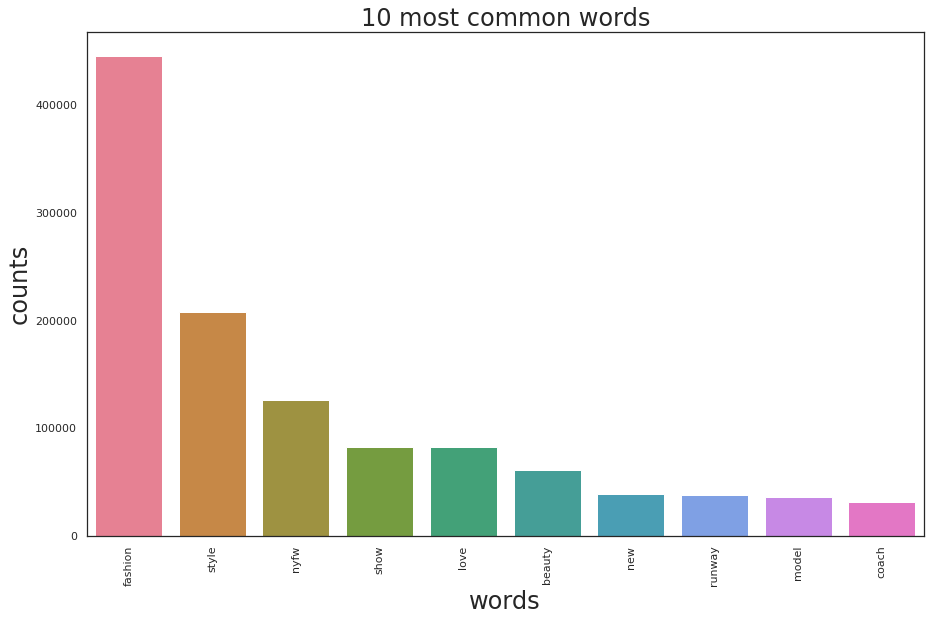

In [6]:
plot_10_most_common_words(tf,vectorizer)

We save these vectorizers on disk 

In [7]:
import pickle

# pickle vectorizer
filename = '/kaggle/working/count_vectorizer.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

# pickle vectorizer - ngram
filename = '/kaggle/working/ngram_count_vectorizer.sav'
pickle.dump(vectorizer_ngram, open(filename, 'wb'))

We can give a look at the sparcity of the words, in our tf vectors. 

We create the model, initially with 10 topics. 

In [8]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [9]:
#%%time
#from pyLDAvis import sklearn as sklearn_lda
import pickle 
#import pyLDAvis
#import os 

#LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_of_topics))
# # this is a bit time consuming - make the if statement True
# if you want to execute visualization prep yourself
#if 1 == 1:
#LDAvis_prepared = sklearn_lda.prepare(model, tf, vectorizer)
#with open(LDAvis_data_filepath, 'wb') as f:
#        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath,'rb') as f:
#    LDAvis_prepared = pickle.load(f)
#pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_of_topics) +'.html')

### GridSearch the best LDA model

Tuning parameter for LDA models is 
- `n_components`: number of topics.
- `learning_decay`: which controls the learning rate.
- `learning_offset`: downweigh early iterations. Should be > 1.
- `max_iter`: 

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
random_state = 1234

In [11]:
# Define Search Param
search_params = {'n_components': [5, 8, 10, 20, 40], 'learning_decay': [.7]}

# Init the Model
lda = LatentDirichletAllocation(learning_method = 'online', n_jobs = -1,evaluate_every = -1, random_state=1234) # random state for reproducibility
# Init Grid Search Class
grid_model = GridSearchCV(lda, param_grid=search_params, verbose=4)

# Do the Grid Search
grid_model.fit(tf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] learning_decay=0.7, n_components=5 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_decay=0.7, n_components=5, score=-12124240.825, total=19.8min
[CV] learning_decay=0.7, n_components=5 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 19.8min remaining:    0.0s


[CV]  learning_decay=0.7, n_components=5, score=-12941190.452, total=20.5min
[CV] learning_decay=0.7, n_components=5 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 40.3min remaining:    0.0s


[CV]  learning_decay=0.7, n_components=5, score=-10377470.887, total=20.8min
[CV] learning_decay=0.7, n_components=5 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 61.0min remaining:    0.0s


[CV]  learning_decay=0.7, n_components=5, score=-10496513.689, total=20.9min
[CV] learning_decay=0.7, n_components=5 ..............................
[CV]  learning_decay=0.7, n_components=5, score=-10439251.719, total=20.6min
[CV] learning_decay=0.7, n_components=8 ..............................
[CV]  learning_decay=0.7, n_components=8, score=-12252814.112, total=21.3min
[CV] learning_decay=0.7, n_components=8 ..............................
[CV]  learning_decay=0.7, n_components=8, score=-13260403.438, total=21.6min
[CV] learning_decay=0.7, n_components=8 ..............................
[CV]  learning_decay=0.7, n_components=8, score=-10629434.647, total=21.6min
[CV] learning_decay=0.7, n_components=8 ..............................
[CV]  learning_decay=0.7, n_components=8, score=-10774783.100, total=21.4min
[CV] learning_decay=0.7, n_components=8 ..............................
[CV]  learning_decay=0.7, n_components=8, score=-10736707.213, total=21.6min
[CV] learning_decay=0.7, n_componen

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 480.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='online',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=-1,
                                                 perp_tol=0.1,
                                                 random_state=1234,
                                                 topic_word_prior=None,
                                                 total

In [12]:
# Best Model
best_lda_model = grid_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", grid_model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", grid_model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 5}
Best Log Likelihood Score:  -11275733.514444029
Model Perplexity:  844.4401896605398


In [13]:
# pickle best lda model
filename = '/kaggle/working/best_lda_model.sav'
pickle.dump(best_lda_model, open(filename, 'wb'))

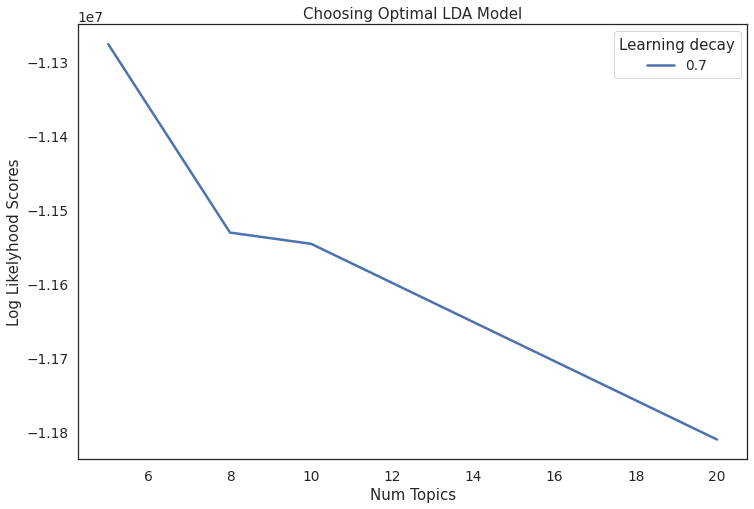

In [14]:
# Get Log Likelyhoods from Grid Search Output
n_topics = search_params['n_components']

log_likelyhoods_7 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.7]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()